In [212]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [213]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [214]:
# Data source - "https://www.kaggle.com/datasets/mohansacharya/graduate-admissions?resource=download"

df = pd.read_csv('/content/drive/MyDrive/Internship/Admission_Predict.csv')
df.head(4)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80


In [215]:
df.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
124,125,301,106,4,2.5,3.0,8.47,0,0.57
58,59,300,99,1,3.0,2.0,6.80,1,0.36
150,151,334,114,4,4.0,4.0,9.43,1,0.93
34,35,331,112,5,4.0,5.0,9.80,1,0.94
138,139,326,116,2,4.5,3.0,9.08,1,0.80


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [218]:
df.shape

(500, 9)

In [219]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [220]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [221]:
df = df.drop('Serial No.',axis=1)

<Axes: >

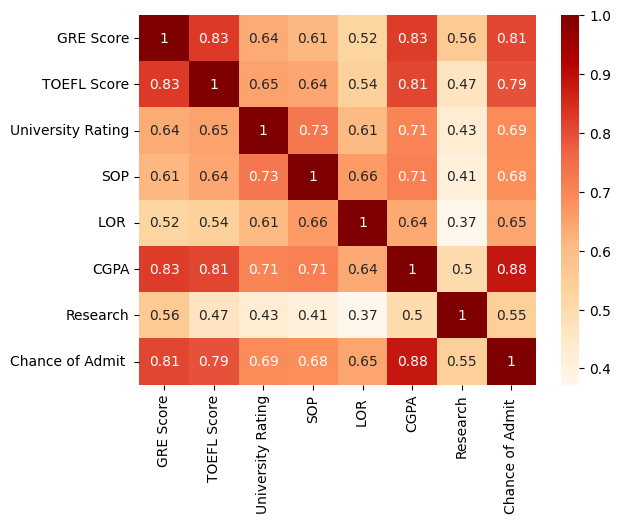

In [222]:
# sns.heatmap(df.corr(),annot=True,cmap='coolwarm',center='blue')
# plt.figure(figsize=[18,7])
# plt.show()

sns.heatmap(df.corr(),annot=True,cmap='OrRd')

From above heat map we can conclude that GRE Score, TOEFL Score and CGPA these features are more correlated to Chance of Admit

In [223]:
X=df.drop('Chance of Admit ',axis=1)
y=df['Chance of Admit ']
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [224]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder()
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [225]:
X.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,45,26,3,7,7,170,1
1,32,15,3,6,7,112,1


In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [227]:
X_train.shape

(350, 7)

In [228]:
y_train.shape

(350,)

In [229]:
# Applying Logistic regression model

from sklearn.linear_model import LogisticRegression
Logregression_model = LogisticRegression(max_iter=10000)
Logregression_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [230]:
print('Train data Accuracy is: ',Logregression_model.score(X_train, y_train))

Train data Accuracy is:  0.3142857142857143


In [231]:
print('Test data Accuracy is: ',Logregression_model.score(X_test, y_test))

Test data Accuracy is:  0.08666666666666667


In [232]:
# Applying Linear regression model

Linmodel = LinearRegression()
Linmodel.fit(X_train,y_train)

LinearRegression()

In [233]:
y_pred = Linmodel.predict(X_test)

print(f"r2 Score of test set : {r2_score(y_test, y_pred)}")

r2 Score of test set : 0.8114805939691432


In [234]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(y_test,y_pred)

35.608592741141756

In [235]:
Linmodel.score(X_test, y_test)

0.8114805939691432

In [236]:
print('Train data Accuracy is: ',Linmodel.score(X_train, y_train))

Train data Accuracy is:  0.8237318102430461


In [237]:
print('Test data Accuracy is: ',Linmodel.score(X_test, y_test))

Test data Accuracy is:  0.8114805939691432


# Linear Regression is giving better accuracy then Logistic Regression model